<h1>ECE521 Assignment 3</h1>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

<h2>Utils</h2>

In [40]:
def reduce_logsumexp(input_tensor, reduction_indices=1, keep_dims=False):
  """Computes the sum of elements across dimensions of a tensor in log domain.
     
     It uses a similar API to tf.reduce_sum.

  Args:
    input_tensor: The tensor to reduce. Should have numeric type.
    reduction_indices: The dimensions to reduce. 
    keep_dims: If true, retains reduced dimensions with length 1.
  Returns:
    The reduced tensor.
  """
  max_input_tensor1 = tf.reduce_max(input_tensor, 
                                    reduction_indices, keep_dims=keep_dims)
  max_input_tensor2 = max_input_tensor1
  if not keep_dims:
    max_input_tensor2 = tf.expand_dims(max_input_tensor2, 
                                       reduction_indices) 
  return tf.log(tf.reduce_sum(tf.exp(input_tensor - max_input_tensor2), 
                                reduction_indices, keep_dims=keep_dims)) + max_input_tensor1

def logsoftmax(input_tensor):
  """Computes normal softmax nonlinearity in log domain.

     It can be used to normalize log probability.
     The softmax is always computed along the second dimension of the input Tensor.     
 
  Args:
    input_tensor: Unnormalized log probability.
  Returns:
    normalized log probability.
  """
  return input_tensor - reduce_logsumexp(input_tensor, keep_dims=True)

<h2>1</h2>

<h3>1.1.2</h3>

In [43]:
data = np.load("../data/data2D.npy")
points_2d = data
x = points_2d[:,0]
y = points_2d[:,1]
Number_of_data = len(x)
print(x)
print(y)

[ 1.69424762  1.12750805  2.40075462 ..., -1.11873012  1.58777283
  1.36922966]
[-2.4385797  -2.06013747 -2.96636567 ..., -3.41074163  0.14010238
  0.26141621]


In [4]:
def buildGraph_K_means_Adam(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 2], name='input_points')
    centroids = tf.Variable(tf.truncated_normal(shape=[K,2], stddev=0.5), name='centroids')
    N = tf.shape(points)[0]
    # Replicate to N copies of each centroid and K copies of each
    # point, then subtract and compute the sum of squared distances.
    rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
    rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
    sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), reduction_indices=2)
    best_centroids = tf.argmin(sum_squares, 1)
    count = tf.to_float(tf.unsorted_segment_sum(tf.ones_like(points), best_centroids, K))
    percentage = tf.div(count, tf.to_float(N))
    # Loss definition
    indices_pair = tf.concat(1, [tf.reshape(tf.range(0, N), [-1,1]), tf.to_int32(tf.reshape(best_centroids, [-1,1]))])
    loss = tf.reduce_sum(tf.gather_nd(sum_squares, indices_pair))
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, centroids, best_centroids, loss, percentage, train

In [5]:
a = tf.constant([[1,1],[0,0],[1,0]])
b = tf.constant([1,0,1])
indices_pair = tf.reshape(tf.range(0, 3), [-1,1])
concated = tf.concat(1, [indices_pair, tf.reshape(b, [-1,1])])
#concated = tf.reshape(concated, [-1,2])
sess = tf.InteractiveSession()
sess.run(concated)

array([[0, 1],
       [1, 0],
       [2, 1]], dtype=int32)

In [6]:
# fix figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


Iteration#: 0, loss: 55810.42
Iteration#: 100, loss: 25690.72
Iteration#: 200, loss: 12603.99
Iteration#: 300, loss: 7025.07
Iteration#: 400, loss: 5509.37
Iteration#: 500, loss: 5135.60


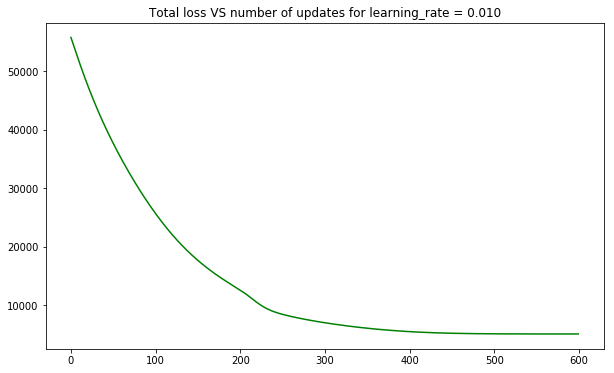

In [7]:
learning_rate = 0.01
points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam(3, learning_rate)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
loss_recorder = np.array([])

numIteration = 600
for itr in range(numIteration):
    loss_, _ = sess.run([loss, train], feed_dict={points: points_2d})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 100 == 0:
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))
plt.plot(np.arange(numIteration), loss_recorder, 'g')
#plt.axis([0,500, 0, 2])
plt.title("Total loss VS number of updates for learning_rate = %0.3f"%(learning_rate))
plt.show()

<h3>1.1.3</h3>

Number of cluster: 1, loss: 87793.05
Number of cluster: 1, loss: 55274.82
Number of cluster: 1, loss: 42082.45
Number of cluster: 1, loss: 38764.37
Number of cluster: 1, loss: 38456.98
Number of cluster: 1, loss: 38453.49
Percentage for different clusters:
Total K is 1, cluster 0: 1.00


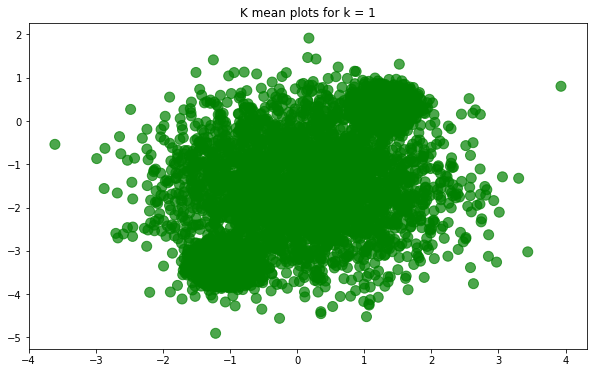

Number of cluster: 2, loss: 63089.80
Number of cluster: 2, loss: 30832.41
Number of cluster: 2, loss: 17337.04
Number of cluster: 2, loss: 11485.78
Number of cluster: 2, loss: 9581.30
Number of cluster: 2, loss: 9225.11
Percentage for different clusters:
Total K is 2, cluster 0: 0.50
Total K is 2, cluster 1: 0.50


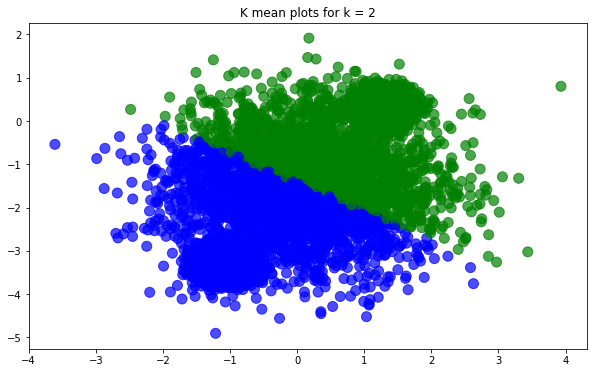

Number of cluster: 3, loss: 37979.09
Number of cluster: 3, loss: 14974.85
Number of cluster: 3, loss: 7265.74
Number of cluster: 3, loss: 5567.53
Number of cluster: 3, loss: 5139.09
Number of cluster: 3, loss: 5111.21
Percentage for different clusters:
Total K is 3, cluster 0: 0.24
Total K is 3, cluster 1: 0.38
Total K is 3, cluster 2: 0.38


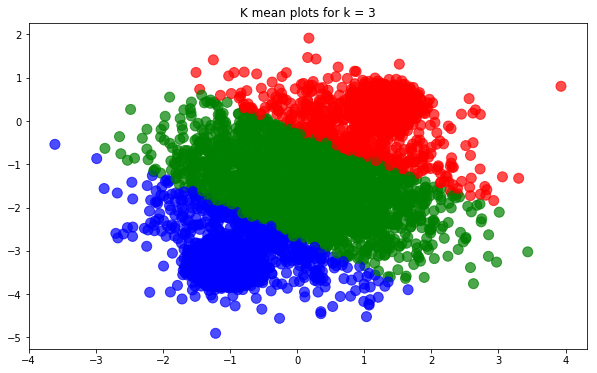

Number of cluster: 4, loss: 28593.64
Number of cluster: 4, loss: 10570.67
Number of cluster: 4, loss: 5136.57
Number of cluster: 4, loss: 3597.04
Number of cluster: 4, loss: 3381.02
Number of cluster: 4, loss: 3374.04
Percentage for different clusters:
Total K is 4, cluster 0: 0.13
Total K is 4, cluster 1: 0.37
Total K is 4, cluster 2: 0.12
Total K is 4, cluster 3: 0.37


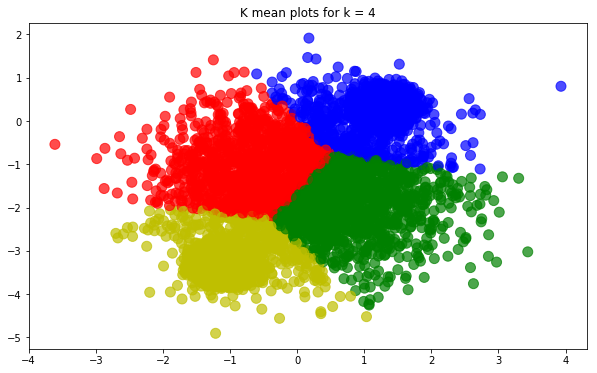

Number of cluster: 5, loss: 44631.66
Number of cluster: 5, loss: 18610.52
Number of cluster: 5, loss: 8350.09
Number of cluster: 5, loss: 4236.36
Number of cluster: 5, loss: 3043.15
Number of cluster: 5, loss: 2875.92
Percentage for different clusters:
Total K is 5, cluster 0: 0.37
Total K is 5, cluster 1: 0.11
Total K is 5, cluster 2: 0.07
Total K is 5, cluster 3: 0.08
Total K is 5, cluster 4: 0.37


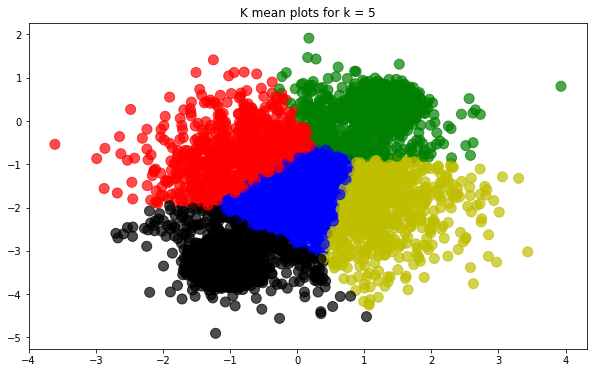

In [11]:
K_list = [1, 2, 3, 4, 5]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
for K in K_list:
    points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    loss_recorder = np.array([])

    numIteration = 600
    P = []
    assign = []
    for itr in range(numIteration):
        loss_, P, assign, _ = sess.run([loss, percentage, centroids_assign, train], feed_dict={points: points_2d})
        loss_recorder = np.append(loss_recorder, loss_)
        if itr % 100 == 0:
            print("Number of cluster: %d, loss: %0.2f"%(K, loss_))
    print("Percentage for different clusters:")
    for k in range(K):
        print("Total K is %d, cluster %d: %0.2f"%(K, k, P[k][0])) 
    x = points_2d[:,0]
    y = points_2d[:,1]
    colors = [color_list[assign[i]] for i in range(len(x))]
    plt.scatter(x,y,c=colors,alpha=0.7,s=100)
    #plt.axis([0,500, 0, 2])
    plt.title("K mean plots for k = %d"%(K))
    plt.show()

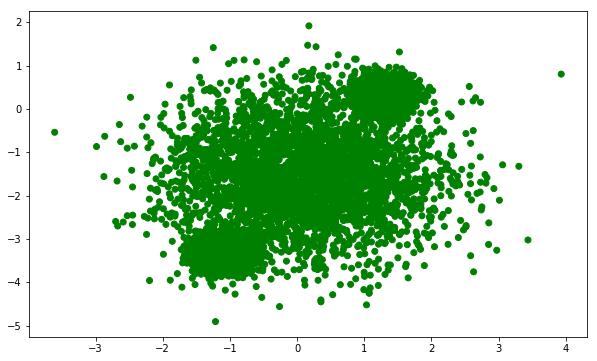

In [12]:
x = points_2d[:,0]
y = points_2d[:,1]
colors = ["g" for i in points_2d[:,0]]
plt.scatter(x,y,c=colors)

<h3>1.1.4</h3>

In [46]:
validSize = int(Number_of_data * 1.0 / 3.0)
validData = points_2d[:validSize,:]
trainData = points_2d[validSize:,:]
print(validData)

[[ 1.69424762 -2.4385797 ]
 [ 1.12750805 -2.06013747]
 [ 2.40075462 -2.96636567]
 ..., 
 [ 1.34861077  0.21586008]
 [-0.33089382 -2.13849022]
 [ 1.47810309  0.71745904]]


Number of cluster: 1, Iteration#: 0, Validation loss: 21212.65
Number of cluster: 1, Iteration#: 100, Validation loss: 14422.10
Number of cluster: 1, Iteration#: 200, Validation loss: 12857.48
Number of cluster: 1, Iteration#: 300, Validation loss: 12752.73
Number of cluster: 1, Iteration#: 400, Validation loss: 12753.19
Number of cluster: 1, Iteration#: 500, Validation loss: 12753.19
Number of cluster: 2, Iteration#: 0, Validation loss: 14573.58
Number of cluster: 2, Iteration#: 100, Validation loss: 6937.41
Number of cluster: 2, Iteration#: 200, Validation loss: 4162.62
Number of cluster: 2, Iteration#: 300, Validation loss: 3230.09
Number of cluster: 2, Iteration#: 400, Validation loss: 3037.77
Number of cluster: 2, Iteration#: 500, Validation loss: 3023.49
Number of cluster: 3, Iteration#: 0, Validation loss: 13124.49
Number of cluster: 3, Iteration#: 100, Validation loss: 5550.97
Number of cluster: 3, Iteration#: 200, Validation loss: 2667.95
Number of cluster: 3, Iteration#: 300,

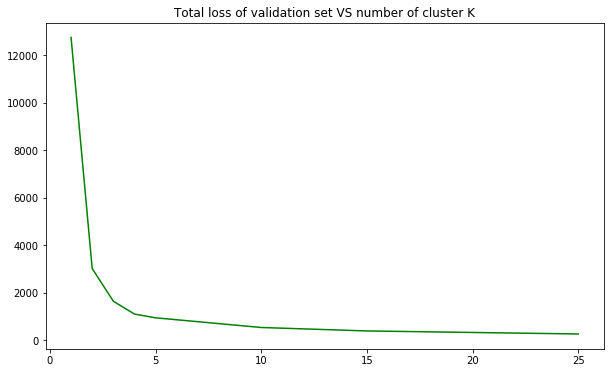

In [17]:
K_list = [1, 2, 3, 4, 5, 10, 15, 20, 25]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
loss_recorder = np.array([])

for K in K_list:
    tf.reset_default_graph()
    points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)    
    numIteration = 600
    for itr in range(numIteration):
        _ = sess.run([train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    loss_ = sess.run(loss, feed_dict={points: validData})
    loss_recorder = np.append(loss_recorder, loss_)
plt.plot(K_list, loss_recorder, 'g')
plt.title("Total loss of validation set VS number of cluster K")
plt.show()

<h3>2.1.2</h3>

In [49]:
def get_log_gaussian(X, mu, diag_stdev):
    '''
    X: BxD
    mu: KxD
    diag_stdev: KxD
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return BxK matrix
    '''
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    rep_X = tf.reshape(tf.tile(X, [1, K]), [B, K, D])
    dist = tf.contrib.distributions.MultivariateNormalDiag(mu, diag_stdev)
    return dist.log_pdf(rep_X)
    

In [50]:
mu = tf.constant([[1.0,3.0],[5.0,2.0],[1.0,3.0]], dtype=tf.float64)
diag_stdev = tf.constant([[1.0,1.0], [1.0,1.0],[1.0,1.0]], dtype=tf.float64)
X = tf.placeholder(tf.float64, [None, 2])
dist = get_log_gaussian(X, mu, diag_stdev)

sess = tf.InteractiveSession()
sess.run(dist, feed_dict={X: points_2d})

array([[-16.86794151, -17.15237132, -16.86794151],
       [-14.64850181, -17.57833214, -14.64850181],
       [-20.61769351, -17.54830934, -20.61769351],
       ..., 
       [-24.63118986, -35.19536871, -24.63118986],
       [ -6.10012272,  -9.38913378,  -6.10012272],
       [ -5.65596292,  -9.94046048,  -5.65596292]])

<h3>2.1.3</h3>

In [51]:
def get_log_P_Z_given_X(X, pi, mu, diag_stdev):
    '''
    X: BxD
    pi: 1xK
    mu: KxD
    diag_stdev: KxD
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return BxK matrix
    '''
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    rep_pi = tf.reshape(tf.tile(pi, [1,B]), [B, K])
    log_gaussian = get_log_gaussian(X, mu, diag_stdev)
    res = logsoftmax(rep_pi + log_gaussian)
    return res
    

In [52]:
mu = tf.constant([[1.0,3.0],[5.0,2.0]], dtype=tf.float64)
diag_stdev = tf.constant([[1.0, 1.0],[1.0, 1.0]], dtype=tf.float64)
# print sess.run(tf.shape(diag_stdev))
pi = logsoftmax(tf.constant([[0.5,0.5]], dtype=tf.float64))
X = tf.placeholder(tf.float64, [None, 2])
res = get_log_P_Z_given_X(X, pi, mu, diag_stdev)
sess = tf.InteractiveSession()
sess.run(res, feed_dict={X: points_2d})

array([[ -5.61010909e-01,  -8.45440722e-01],
       [ -5.20288178e-02,  -2.98185915e+00],
       [ -3.11478742e+00,  -4.54032457e-02],
       ..., 
       [ -2.58243746e-05,  -1.05642047e+01],
       [ -3.66122269e-02,  -3.32562329e+00],
       [ -1.36864553e-02,  -4.29818402e+00]])

<h3>2.2.2</h3>

In [53]:
def get_log_P(X, pi, mu, diag_stdev):
    '''
    X: BxD
    pi: 1xK
    mu: KxD
    diag_stdev: Kx1
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return float64
    '''
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    rep_pi = tf.reshape(tf.tile(pi, [1,B]), [B, K])
    log_gaussian = get_log_gaussian(X, mu, diag_stdev)
    res = tf.reduce_sum(reduce_logsumexp(rep_pi + log_gaussian))
    return res

In [56]:
K = 2
mu = tf.Variable(tf.truncated_normal(shape=[K,2], stddev=0.5), name='mu_test')
diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,2], stddev=0.5)), name='diag_stdev_test')
phi = tf.Variable(tf.div(tf.ones(shape=[1,K]), K), name='phi_test')
pi = logsoftmax(phi)
X = tf.placeholder(tf.float32, [None, 2])
res = get_log_P(X, pi, mu, diag_stdev)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
#sess.run(tf.shape(mu)[0])
sess.run(res, feed_dict={X: points_2d})

-38371.062

In [77]:
def buildGraph_MoG_Adam_2d(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 2], name='input_points')
    mu = tf.Variable(tf.truncated_normal(shape=[K,2], stddev=0.5), name='mu')
    
#     Covariance matrix
#     diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,2], stddev=0.5)), name='diag_stdev')
#     print "Using covariance matrix"

#     Single sigma value
    sigma = tf.Variable(tf.exp(tf.truncated_normal(shape=[K], stddev=0.5)), name='sigma')
    diag_stdev = tf.transpose(tf.reshape(tf.tile(sigma, [2], name='diag_stdev'),[2,K]))
    print "Using single sigma"
    
    phi = tf.Variable(tf.truncated_normal(shape=[1,K], stddev=0.5), name='phi')
    pi = logsoftmax(phi)
    
    # Loss definition
    loss = -get_log_P(points, pi, mu, diag_stdev)
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, pi, mu, diag_stdev, loss, train

Iteration#: 0, loss: 42946.06
Mean matrix is:
[[-0.28121221  0.22856487]
 [-0.35776582 -0.23013702]
 [ 0.2893869  -0.07434197]
 [-0.03971703  0.44185489]
 [-0.1913363  -0.07396097]]
diag_stdev is:
[[ 1.83591235  1.83591235]
 [ 0.4158802   0.4158802 ]
 [ 0.74986041  0.74986041]
 [ 2.04846382  2.04846382]
 [ 1.30017126  1.30017126]]
pi is:
[[-1.54848301 -1.48543084 -1.94309485 -1.95422363 -1.28702617]]
Iteration#: 100, loss: 28945.84
Mean matrix is:
[[-0.45632434 -0.57473683]
 [ 0.10723647 -1.28029811]
 [ 1.33618569  0.30871865]
 [-0.47144189 -0.30507478]
 [-0.52292609 -1.0469054 ]]
diag_stdev is:
[[ 1.79874206  1.79874206]
 [ 1.13322484  1.13322484]
 [ 0.19036707  0.19036707]
 [ 1.91510904  1.91510904]
 [ 1.5838505   1.5838505 ]]
pi is:
[[-2.07125688 -2.25949335 -1.18847632 -2.80311489 -0.90568912]]
Iteration#: 200, loss: 24425.29
Mean matrix is:
[[ 0.63087064 -0.90715206]
 [-0.5374369  -2.2532022 ]
 [ 1.29763126  0.30709234]
 [ 0.27170277 -0.59853667]
 [-0.60105979 -2.10505748]]
diag_s

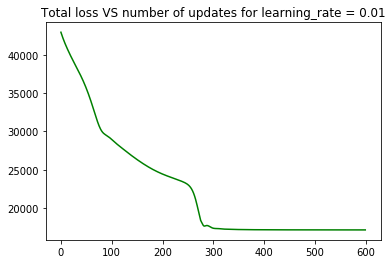

In [74]:
learning_rate = 0.01
points, pi, mu, diag_stdev, loss, train = buildGraph_MoG_Adam_2d(5, learning_rate)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
loss_recorder = np.array([])

numIteration = 600
best_pi = []
for itr in range(numIteration):
    loss_, best_pi, mu_, diag_stdev_, _ = sess.run([loss, pi, mu, diag_stdev, train], feed_dict={points: points_2d})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 100 == 0:
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))
        print("Mean matrix is:")
        print(mu_)
        print("diag_stdev is:")
        print(diag_stdev_)
        print("pi is:")
        print(best_pi)
best_pi = sess.run(tf.exp(best_pi))
print("The best pi values are:")
print(best_pi)
plt.plot(np.arange(numIteration), loss_recorder, 'g')
#plt.axis([0,500, 0, 2])
plt.title("Total loss VS number of updates for learning_rate = %0.2f"%(learning_rate))
plt.show()

<h3>2.2.3</h3>

In [75]:
def get_MoG_assign(X, pi, mi, diag_stdev):
    assign = tf.argmax(get_log_P_Z_given_X(X, pi, mu, diag_stdev), 1)
    return assign

Using single sigma
Number of cluster: 1, Iteration#: 0, Validation loss: 24989.58
Number of cluster: 1, Iteration#: 100, Validation loss: 13774.69
Number of cluster: 1, Iteration#: 200, Validation loss: 12573.76
Number of cluster: 1, Iteration#: 300, Validation loss: 11934.89
Number of cluster: 1, Iteration#: 400, Validation loss: 11645.83
Number of cluster: 1, Iteration#: 500, Validation loss: 11620.94
Number of cluster: 1, Iteration#: 600, Validation loss: 11621.06
Number of cluster: 1, Iteration#: 700, Validation loss: 11621.07
Number of cluster: 1, Iteration#: 800, Validation loss: 11621.07
Number of cluster: 1, Iteration#: 900, Validation loss: 11621.07
('diag_stdev: ', array([[ 1.3883239,  1.3883239]], dtype=float32))
('pi: ', array([[ 1.]], dtype=float32))


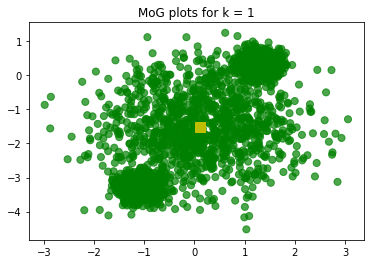

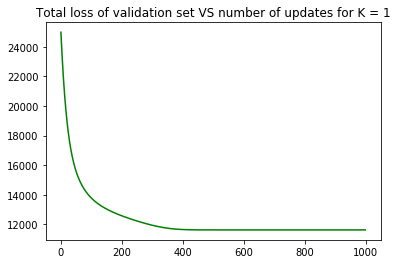

Using single sigma
Number of cluster: 2, Iteration#: 0, Validation loss: 13286.58
Number of cluster: 2, Iteration#: 100, Validation loss: 9541.59
Number of cluster: 2, Iteration#: 200, Validation loss: 8108.34
Number of cluster: 2, Iteration#: 300, Validation loss: 8054.87
Number of cluster: 2, Iteration#: 400, Validation loss: 8054.95
Number of cluster: 2, Iteration#: 500, Validation loss: 8054.95
Number of cluster: 2, Iteration#: 600, Validation loss: 8054.95
Number of cluster: 2, Iteration#: 700, Validation loss: 8054.95
Number of cluster: 2, Iteration#: 800, Validation loss: 8054.95
Number of cluster: 2, Iteration#: 900, Validation loss: 8054.79
('diag_stdev: ', array([[ 0.20317177,  0.20317177],
       [ 1.02482724,  1.02482724]], dtype=float32))
('pi: ', array([[ 0.34191641,  0.6580835 ]], dtype=float32))


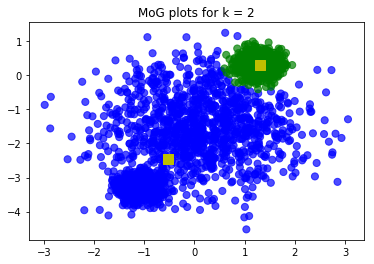

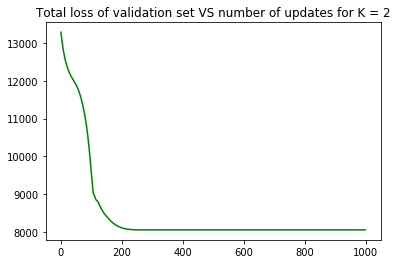

Using single sigma
Number of cluster: 3, Iteration#: 0, Validation loss: 14839.22
Number of cluster: 3, Iteration#: 100, Validation loss: 9582.53
Number of cluster: 3, Iteration#: 200, Validation loss: 8532.64
Number of cluster: 3, Iteration#: 300, Validation loss: 7631.06
Number of cluster: 3, Iteration#: 400, Validation loss: 5684.85
Number of cluster: 3, Iteration#: 500, Validation loss: 5683.79
Number of cluster: 3, Iteration#: 600, Validation loss: 5683.92
Number of cluster: 3, Iteration#: 700, Validation loss: 5683.78
Number of cluster: 3, Iteration#: 800, Validation loss: 5683.54
Number of cluster: 3, Iteration#: 900, Validation loss: 5683.92
('diag_stdev: ', array([[ 0.19596334,  0.19596334],
       [ 1.00343525,  1.00343525],
       [ 0.19875224,  0.19875224]], dtype=float32))
('pi: ', array([[ 0.33360794,  0.33407858,  0.33231339]], dtype=float32))


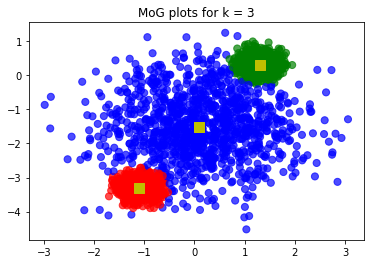

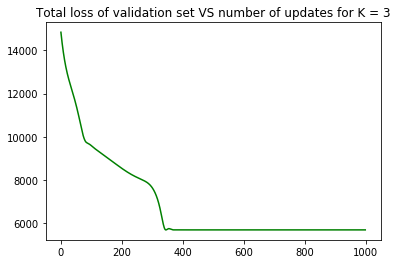

Using single sigma
Number of cluster: 4, Iteration#: 0, Validation loss: 15559.75
Number of cluster: 4, Iteration#: 100, Validation loss: 10004.27
Number of cluster: 4, Iteration#: 200, Validation loss: 8362.78
Number of cluster: 4, Iteration#: 300, Validation loss: 6281.42
Number of cluster: 4, Iteration#: 400, Validation loss: 5687.23
Number of cluster: 4, Iteration#: 500, Validation loss: 5685.04
Number of cluster: 4, Iteration#: 600, Validation loss: 5684.79
Number of cluster: 4, Iteration#: 700, Validation loss: 5684.61
Number of cluster: 4, Iteration#: 800, Validation loss: 5684.48
Number of cluster: 4, Iteration#: 900, Validation loss: 5684.32
('diag_stdev: ', array([[ 0.19905008,  0.19905008],
       [ 0.98302317,  0.98302317],
       [ 0.99390703,  0.99390703],
       [ 0.19636682,  0.19636682]], dtype=float32))
('pi: ', array([[ 0.33265394,  0.08649637,  0.24692802,  0.33392167]], dtype=float32))


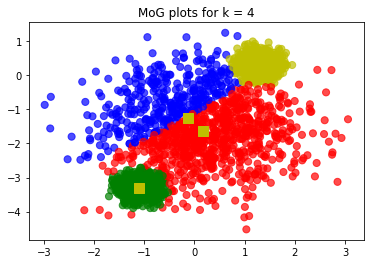

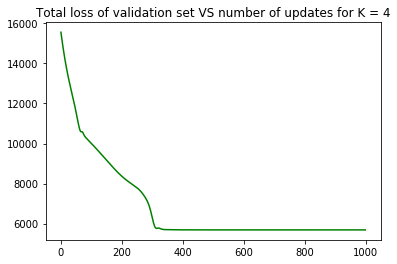

Using single sigma
Number of cluster: 5, Iteration#: 0, Validation loss: 15143.42
Number of cluster: 5, Iteration#: 100, Validation loss: 10422.53
Number of cluster: 5, Iteration#: 200, Validation loss: 7704.23
Number of cluster: 5, Iteration#: 300, Validation loss: 5686.21
Number of cluster: 5, Iteration#: 400, Validation loss: 5684.85
Number of cluster: 5, Iteration#: 500, Validation loss: 5684.28
Number of cluster: 5, Iteration#: 600, Validation loss: 5684.22
Number of cluster: 5, Iteration#: 700, Validation loss: 5685.00
Number of cluster: 5, Iteration#: 800, Validation loss: 5685.10
Number of cluster: 5, Iteration#: 900, Validation loss: 5684.92
('diag_stdev: ', array([[ 0.87577182,  0.87577182],
       [ 0.9721061 ,  0.9721061 ],
       [ 0.19930303,  0.19930303],
       [ 0.90414488,  0.90414488],
       [ 0.19590512,  0.19590512]], dtype=float32))
('pi: ', array([[ 0.05261574,  0.24566826,  0.33307242,  0.03488178,  0.33376172]], dtype=float32))


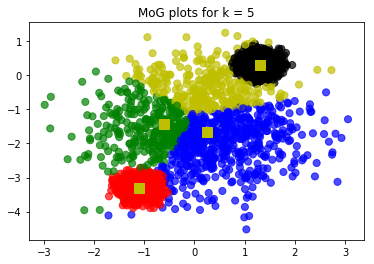

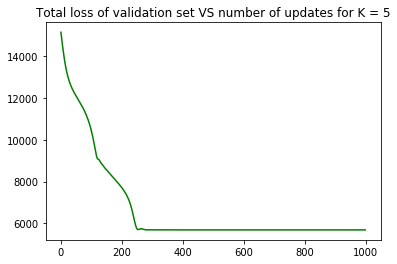

In [78]:
K_list = [1, 2, 3, 4, 5]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
number_of_valid_data = validData.shape[0]
for K in K_list:
    tf.reset_default_graph()
    points, pi, mu, diag_stdev, loss, train = buildGraph_MoG_Adam_2d(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    loss_recorder = np.array([])
    
    numIteration = 1000
    pi_, mu_, diag_stdev_ = [], [], []
    for itr in range(numIteration):
        pi_,mu_,diag_stdev_,_ = sess.run([pi, mu, diag_stdev, train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        loss_recorder = np.append(loss_recorder, loss_)
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    print("diag_stdev: ", diag_stdev_)
    pi_ = sess.run(tf.exp(pi_))
    print("pi: ", pi_)
    rep_diag_stdev = tf.reshape(tf.tile(diag_stdev, [1,2]), [K,2,2])
    rep_diag_stdev = sess.run(rep_diag_stdev)
    x = validData[:,0]
    y = validData[:,1]
    #print(pi_, mu_, diag_stdev_)
    assign = get_MoG_assign(points, pi_, mu_, diag_stdev_)
    assign = sess.run(assign, feed_dict={points: validData})
    #print(assign)
    colors = [color_list[assign[i]] for i in range(number_of_valid_data)]
    plt.scatter(x,y,c=colors,alpha=0.7,s=50)
    plt.scatter(mu_[:,0],mu_[:,1],marker='s', c="y",s=100)

    #plt.axis([0,500, 0, 2])
    plt.title("MoG plots for k = %d"%(K))
    plt.show()
    
    plt.plot(np.arange(numIteration), loss_recorder, 'g')
    #plt.axis([0,500, 0, 2])
    plt.title("Total loss of validation set VS number of updates for K = %d"%(K))
    plt.show()

<h3>2.2.4</h3>

In [27]:
points_100d = np.load("../data/data100D.npy")

In [86]:
Number_of_data = points_100d.shape[0]
validSize = int(Number_of_data * 1.0 / 3.0)
validData = points_100d[:validSize,:]
trainData = points_100d[validSize:,:]
print validData.shape
print trainData.shape

(3333, 100)
(6667, 100)


In [30]:
def buildGraph_K_means_Adam_100d(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 100], name='input_points')
    centroids = tf.Variable(tf.truncated_normal(shape=[K,100], stddev=0.5), name='centroids')
    N = tf.shape(points)[0]
    # Replicate to N copies of each centroid and K copies of each
    # point, then subtract and compute the sum of squared distances.
    rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 100])
    rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 100])
    sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), reduction_indices=2)
    best_centroids = tf.argmin(sum_squares, 1)
    count = tf.to_float(tf.unsorted_segment_sum(tf.ones_like(points), best_centroids, K))
    percentage = tf.div(count, tf.to_float(N))
    # Loss definition
    indices_pair = tf.concat(1, [tf.reshape(tf.range(0, N), [-1,1]), tf.to_int32(tf.reshape(best_centroids, [-1,1]))])
    loss = tf.reduce_sum(tf.gather_nd(sum_squares, indices_pair))
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, centroids, best_centroids, loss, percentage, train

Number of cluster: 5, Iteration#: 0, Validation loss: 358858.78
Number of cluster: 5, Iteration#: 100, Validation loss: 114668.54
Number of cluster: 5, Iteration#: 200, Validation loss: 77854.22
Number of cluster: 5, Iteration#: 300, Validation loss: 73424.12
Number of cluster: 5, Iteration#: 400, Validation loss: 72999.56
Number of cluster: 10, Iteration#: 0, Validation loss: 344971.00
Number of cluster: 10, Iteration#: 100, Validation loss: 105722.01
Number of cluster: 10, Iteration#: 200, Validation loss: 76143.10
Number of cluster: 10, Iteration#: 300, Validation loss: 72728.43
Number of cluster: 10, Iteration#: 400, Validation loss: 72435.64
Number of cluster: 15, Iteration#: 0, Validation loss: 339651.59
Number of cluster: 15, Iteration#: 100, Validation loss: 96025.99
Number of cluster: 15, Iteration#: 200, Validation loss: 75243.09
Number of cluster: 15, Iteration#: 300, Validation loss: 72789.27
Number of cluster: 15, Iteration#: 400, Validation loss: 72314.18
Number of cluste

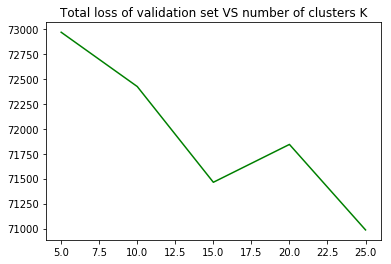

In [31]:
K_list = [5,10,15,20,25]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
loss_recorder = np.array([])
for K in K_list:
    tf.reset_default_graph()
    points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam_100d(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    
    numIteration = 500
    for itr in range(numIteration):
        _ = sess.run([train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    loss_ = sess.run(loss, feed_dict={points: validData})
    loss_recorder = np.append(loss_recorder, loss_)
plt.plot(K_list, loss_recorder, 'g')
    #plt.axis([0,500, 0, 2])
plt.title("Total loss of validation set VS number of clusters K")
plt.show()

In [81]:
def buildGraph_MoG_Adam_100d(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 100], name='input_points')
    mu = tf.Variable(tf.truncated_normal(shape=[K,100], stddev=0.5), name='mu')
    
#     diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,100], stddev=0.5)), name='diag_stdev')

#     Covariance matrix
#     diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,100], stddev=0.5)), name='diag_stdev')
#     print "Using covariance matrix"

#     Single sigma value
    sigma = tf.Variable(tf.exp(tf.truncated_normal(shape=[K], stddev=0.5)), name='sigma')
    diag_stdev = tf.transpose(tf.reshape(tf.tile(sigma, [100], name='diag_stdev'),[100,K]))
    print "Using single sigma"

    phi = tf.Variable(tf.truncated_normal(shape=[1,K], stddev=0.5), name='phi')
    pi = logsoftmax(phi)
    
    # Loss definition
    loss = -get_log_P(points, pi, mu, diag_stdev)
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, pi, mu, diag_stdev, loss, train

In [87]:
K_list = [5,10,15,20,25]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
number_of_valid_data = validData.shape[0]
loss_recorder = np.array([])

for K in K_list:
    tf.reset_default_graph()
    points, pi, mu, diag_stdev, loss, train = buildGraph_MoG_Adam_100d(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    
    numIteration = 600
    pi_, mu_, diag_stdev_ = [], [], []
    for itr in range(numIteration):
        pi_,mu_,diag_stdev_,_ = sess.run([pi, mu, diag_stdev, train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    loss_ = sess.run(loss, feed_dict={points: validData})
    loss_recorder = np.append(loss_recorder, loss_)

    
plt.plot(K_list, loss_recorder, 'g')
    #plt.axis([0,500, 0, 2])
plt.title("Total loss of validation set VS number of clusters K")
plt.show()

Using single sigma
Number of cluster: 5, Iteration#: 0, Validation loss: 501518.28


KeyboardInterrupt: 

<h3>3.2</h3>

In [19]:
data = np.load ("../data/tinymnist.npz")
trainData, trainTarget = data ["x"], data["y"]
validData, validTarget = data ["x_valid"], data ["y_valid"]
testData, testTarget = data ["x_test"], data ["y_test"]

In [3]:
w = tf.constant([[[1,2],[1,2],[1,2]],[[1,2],[1,2],[1,2]]],dtype=tf.float32)
w_t = tf.matrix_transpose(w)
mu = tf.Variable(tf.truncated_normal(shape=[2,3], stddev=0.5), name='mu_test1')
phi = tf.matrix_diag(tf.constant([[1,2,3],[1,2,3]],dtype=tf.float32))
cov_sqrt = tf.cholesky(tf.add(phi, tf.matmul(w, w_t)))
dist = tf.contrib.distributions.MultivariateNormalCholesky(mu, cov_sqrt)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
sess.run(dist.pdf(dist.sample(3)))

array([[ 0.00019365,  0.00149494],
       [ 0.00611958,  0.00603963],
       [ 0.00168961,  0.00155739]], dtype=float32)

In [4]:
def get_log_P_FA(X, mu, diag_stdev, W):
    '''
    X: BxD
    mu: D
    diag_stdev: D
    W: DxK
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return log_p
    '''
    
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(W)[1]
    phi = tf.matrix_diag(diag_stdev)
    W_T = tf.matrix_transpose(W)
    cov_sqrt = tf.add(phi, tf.matmul(W, W_T))
    cholesky_cov = tf.cholesky(cov_sqrt)
    dist = tf.contrib.distributions.MultivariateNormalCholesky(mu, cholesky_cov)
    log_pdf = dist.log_pdf(X)
    res = tf.reduce_sum(log_pdf)
    return res

Iteration#: 1499, loss: -8452.76


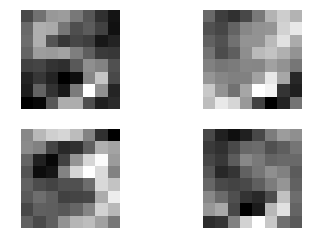

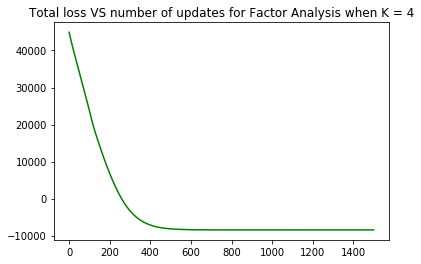

In [18]:
K = 4
learning_rate = 0.01
loss_recorder = np.array([])
tf.reset_default_graph()
points = tf.placeholder(tf.float64, [None, 64], name='input_points_test')
mu = tf.Variable(tf.random_normal(shape=[64], stddev=0.01, dtype=tf.float64))

diag_stdev = tf.exp(tf.Variable(tf.random_normal(shape=[64], stddev=0.01, dtype=tf.float64)))

W = tf.Variable(tf.exp(tf.random_normal(shape=[64,K], stddev=0.01, dtype=tf.float64)))

loss = -get_log_P_FA(points, mu, diag_stdev, W)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)

train = optimizer.minimize(loss=loss)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
numIteration = 1500
for itr in range(numIteration):
    W_, diag_stdev_, loss_, _ = sess.run([W, diag_stdev, loss, train], feed_dict={points: trainData})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 1 == 0:
        clear_output()
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))

for i in range(0,4):
    row = np.reshape(W_[:,i],(8,8))
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.imshow(row,cmap=plt.gray())
plt.show()

plt.plot(np.arange(numIteration), loss_recorder, 'g')
plt.title("Total loss VS number of updates for Factor Analysis when K = {}".format(K) )
plt.show()


<h3> 3.1.3 </h3>

In [22]:
mean = (0,0,0)
cov = [[1,0,0],[0,1,0],[0,0,1]]
toy_data_s = np.random.multivariate_normal(mean, cov, 200)

toy_data_x = np.ones(toy_data_s.shape)
toy_data_x[:,0] = toy_data_s[:,0]
toy_data_x[:,1] = toy_data_s[:,0] + 0.001 * toy_data_s[:,1]
toy_data_x[:,2] = toy_data_s[:,2] * 10

In [23]:
# FA
K = 1
learning_rate = 0.01
loss_recorder = np.array([])
tf.reset_default_graph()
points = tf.placeholder(tf.float64, [None, 3], name='input_points_test')
mu = tf.Variable(tf.truncated_normal(shape=[3], stddev=0.5, dtype=tf.float64))

diag_stdev = tf.exp(tf.Variable(tf.truncated_normal(shape=[3], stddev=0.5, dtype=tf.float64)))

W = tf.Variable(tf.exp(tf.truncated_normal(shape=[3,K], stddev=0.5, dtype=tf.float64)))

loss = -get_log_P_FA(points, mu, diag_stdev, W)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)

train = optimizer.minimize(loss=loss)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
numIteration = 2000
for itr in range(numIteration):
    W_, diag_stdev_, loss_, _ = sess.run([W, diag_stdev, loss, train], feed_dict={points: toy_data_x})
    loss_recorder = np.append(loss_recorder, loss_)
print("Iteration#: %d, loss: %0.2f"%(itr, loss_))

psi = np.diag(diag_stdev_)
psi_inv = np.linalg.inv(psi)
W_proj = np.dot(np.transpose(np.dot(np.linalg.inv(np.eye(3) + np.dot(np.dot(np.transpose(W_),psi_inv), W_)), W_)), psi_inv)
print W_proj

Iteration#: 1999, loss: 36.84
[[ -3.22721642e+05  -3.27079311e+05   1.08759755e-02]]


In [26]:
#PCA
data_mean = np.sum(toy_data_x, axis = 0) / toy_data_x.shape[0]
S = np.dot(np.transpose(toy_data_x - data_mean), (toy_data_x - data_mean)) / toy_data_x.shape[0]
e_v, _ = np.linalg.eig(S)
print e_v
# print np.linalg.eig(np.cov(toy_data_x.T))

[  5.17251732e-07   2.23593055e+00   1.10595655e+02]
(array([  5.19850987e-07,   2.24716638e+00,   1.11151412e+02]), array([[ -7.07125709e-01,   7.07054023e-01,  -6.91669217e-03],
       [  7.07087853e-01,   7.07091882e-01,  -6.91657954e-03],
       [ -3.41501448e-07,   9.78160023e-03,   9.99952159e-01]]))
